## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore Lending Club Listings

In [2]:
#lc_Q1_2019_df = pd.read_csv('lendingclub_listings_2019Q1.csv',low_memory=False, header=1)

# Explore Prosper Listings API/CSV

In [3]:
prosper_2019_df = pd.read_csv('prosper_listings_20190101to20190624.csv')
prosper_2018_df = pd.read_csv('prosper_listings_20180101to20190101.csv')
prosper_2017_df = pd.read_csv('prosper_listings_20170101to20180101.csv')
prosper_2016_df = pd.read_csv('prosper_listings_20160101to20170101.csv')
prosper_2015_df = pd.read_csv('prosper_listings_20150101to20160101.csv')
prosper_2014_df = pd.read_csv('prosper_listings_20140101to20150101.csv')
prosper_2013_df = pd.read_csv('prosper_listings_20130101to20140101.csv')
prosper_2005to2013_df = pd.read_csv('prosper_listings_20050101to20130101.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (535) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,25,27,513,535) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26,535,539,541,542) have mixed types. Specify dtype option on import or set low_memory=False.

In [4]:
#Print Shape of Each DataFrame
print(prosper_2019_df.shape)
print(prosper_2018_df.shape)
print(prosper_2017_df.shape)
print(prosper_2016_df.shape)
print(prosper_2015_df.shape)
print(prosper_2014_df.shape)
print(prosper_2013_df.shape)
print(prosper_2005to2013_df.shape)

(59453, 862)
(227534, 862)
(283841, 862)
(220942, 862)
(373276, 862)
(191986, 862)
(56526, 862)
(444728, 862)


In [5]:
prosper_2019_df.columns.values

array(['member_key', 'listing_number', 'credit_pull_date',
       'listing_start_date', 'listing_end_date', 'listing_creation_date',
       'loan_origination_date', 'listing_status', 'listing_status_reason',
       'verification_stage', 'listing_amount', 'amount_funded',
       'amount_remaining', 'percent_funded', 'partial_funding_indicator',
       'funding_threshold', 'prosper_rating', 'estimated_return',
       'estimated_loss_rate', 'lender_yield', 'effective_yield',
       'borrower_rate', 'borrower_apr', 'listing_term',
       'listing_monthly_payment', 'scorex', 'scorex_change', 'fico_score',
       'prosper_score', 'listing_category_id', 'income_range',
       'income_range_description', 'stated_monthly_income',
       'income_verifiable', 'dti_wprosper_loan',
       'employment_status_description', 'occupation', 'months_employed',
       'borrower_state', 'borrower_city', 'borrower_metropolitan_area',
       'prior_prosper_loans_active', 'prior_prosper_loans',
       'prior_p

### Custom Annotation
- TBD

### Must Use Filters, Predictors, Etc.
- listing_status / listing_status_reason: Active
- amount_remaining


### Possible Target Metrics: Probability of Default
- TBD

### Possible Target Metrics: Predicting Return
- estimated_loss_rate: Estimated principal loss on charge-offs.

- effective_yield = borrower interest rate - servicing fee rate - estimated uncollected interest on charge-offs + estimated collected late fees + estimated post charge-off principal recovery

- estimated_return = Effective Yield - Estimated Loss Rate

### Interesting/Alternative Predictors:
- listing_category_id: Broad borrower-reported loan purpose expressed as an integer.
The mapping for the values is:
1 – Debt Consolidation
2 – Home Improvement
3 – Business
4 – Personal loan
5 – Student use
6 – Auto / Motorcycle / RV / Boat
7 – Other
8 – Baby & Adoption
9 – Boat
10 – Cosmetic Procedures
11 – Engagement Ring Financing
12 – Green Loans
13 – Household Expenses
14 – Large Purchase
15 – Medical / Dental
16 – Motorcycle
17 – RV
18 – Taxes
19 – Vacation
20 – Wedding Loans
21 – Special Occasion
- amount_funded
- amount_remaining
- percent_funded
- borrower_state
- employment_status_description
- estimated_monthly_housing_expense
- income_range / income_range_description
0 = Not displayed
1 = $0
2 = $1-24,999
3 = $25,000-49,999
4 = $50,000-74,999
5 = $75,000-99,999
6 = $100,000+
7 = Not employed
- lender_indicator: does borrower also have investor account?
- listing_term (36 or 60)
- months_employed
- occupation (text string)
- prosper_rating (AA
A
B
C
D
E
HR)
- stated_monthly_income
- income_verifiable

### Merging 2005 - June 2019 Listings DataFrames

In [6]:
prosper_2013_df.columns.values.all() == prosper_2019_df.columns.values.all()

True

In [7]:
#create identifying column before dataframes merge
prosper_2019_df['Year'] = 2019
prosper_2018_df['Year'] = 2018
prosper_2017_df['Year'] = 2017
prosper_2016_df['Year'] = 2016
prosper_2015_df['Year'] = 2015
prosper_2014_df['Year'] = 2014
prosper_2013_df['Year'] = 2013
prosper_2005to2013_df['Year'] = prosper_2005to2013_df['listing_creation_date'].str[0:4]

In [8]:
prosper_master_df = pd.concat([prosper_2019_df,
                               prosper_2018_df,
                               prosper_2017_df,
                               prosper_2016_df,
                               prosper_2015_df,
                               prosper_2014_df,
                               prosper_2013_df,
                               prosper_2005to2013_df], 
                              ignore_index=True)

In [9]:
prosper_master_df.shape

(1858286, 863)

### Explore Combined Listings DataFrame (2005 - June 2019)

### Possible Target Metrics

In [10]:
prosper_master_df['estimated_loss_rate'].value_counts().sort_index(ascending=False).head(10)

0.380    2485
0.366    1095
0.345    2750
0.330    1739
0.250    3240
0.240    2392
0.235    1572
0.203     813
0.195     277
0.190     582
Name: estimated_loss_rate, dtype: int64

In [11]:
prosper_master_df['estimated_loss_rate'].describe()

count    1.537419e+06
mean     7.099750e-02
std      4.651787e-02
min      0.000000e+00
25%      3.990000e-02
50%      6.240000e-02
75%      9.250000e-02
max      3.800000e-01
Name: estimated_loss_rate, dtype: float64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


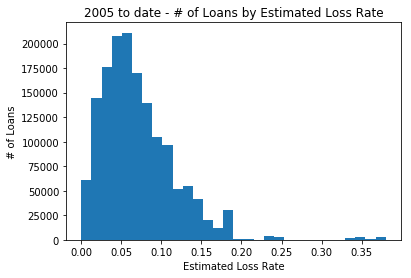

In [12]:
plt.hist(prosper_master_df['estimated_loss_rate'],bins=30);
plt.xlabel('Estimated Loss Rate')
plt.ylabel('# of Loans')
plt.title('2005 to date - # of Loans by Estimated Loss Rate')
plt.show()

In [13]:
prosper_master_df['effective_yield'].value_counts().sort_index(ascending=False).head(10)

0.43580    18
0.42720     8
0.41720    10
0.40410     9
0.39210    15
0.37830    13
0.37000    19
0.35610    21
0.35607     2
0.34211     1
Name: effective_yield, dtype: int64

In [14]:
prosper_master_df['effective_yield'].describe()

count    1.858283e+06
mean     7.995566e-02
std      1.445981e-01
min     -3.900000e-01
25%      6.530000e-02
50%      1.108800e-01
75%      1.629000e-01
max      4.358000e-01
Name: effective_yield, dtype: float64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


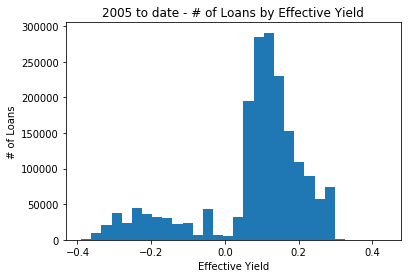

In [15]:
plt.hist(prosper_master_df['effective_yield'],bins=30);
plt.xlabel('Effective Yield')
plt.ylabel('# of Loans')
plt.title('2005 to date - # of Loans by Effective Yield')
plt.show()

In [16]:
prosper_master_df['estimated_return'].value_counts().sort_index(ascending=False).head(10)

0.3332     3
0.3232     2
0.3173     2
0.3142     1
0.3073     1
0.3033     1
0.2883    18
0.2847     8
0.2842     1
0.2837     4
Name: estimated_return, dtype: int64

In [17]:
prosper_master_df['estimated_return'].describe()

count    1.537414e+06
mean     7.068936e-02
std      4.703110e-02
min     -7.600000e-01
25%      5.400000e-02
50%      6.820000e-02
75%      8.760000e-02
max      3.332000e-01
Name: estimated_return, dtype: float64

/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


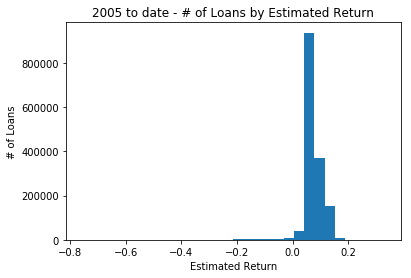

In [18]:
plt.hist(prosper_master_df['estimated_return'],bins=30);
plt.xlabel('Estimated Return')
plt.ylabel('# of Loans')
plt.title('2005 to date - # of Loans by Estimated Return')
plt.show()

In [19]:
prosper_master_df['Year'] = prosper_master_df['Year'].astype(int)

In [20]:
prosper_master_df.sort_values(by='Year',axis=0,ascending=True,inplace=True)

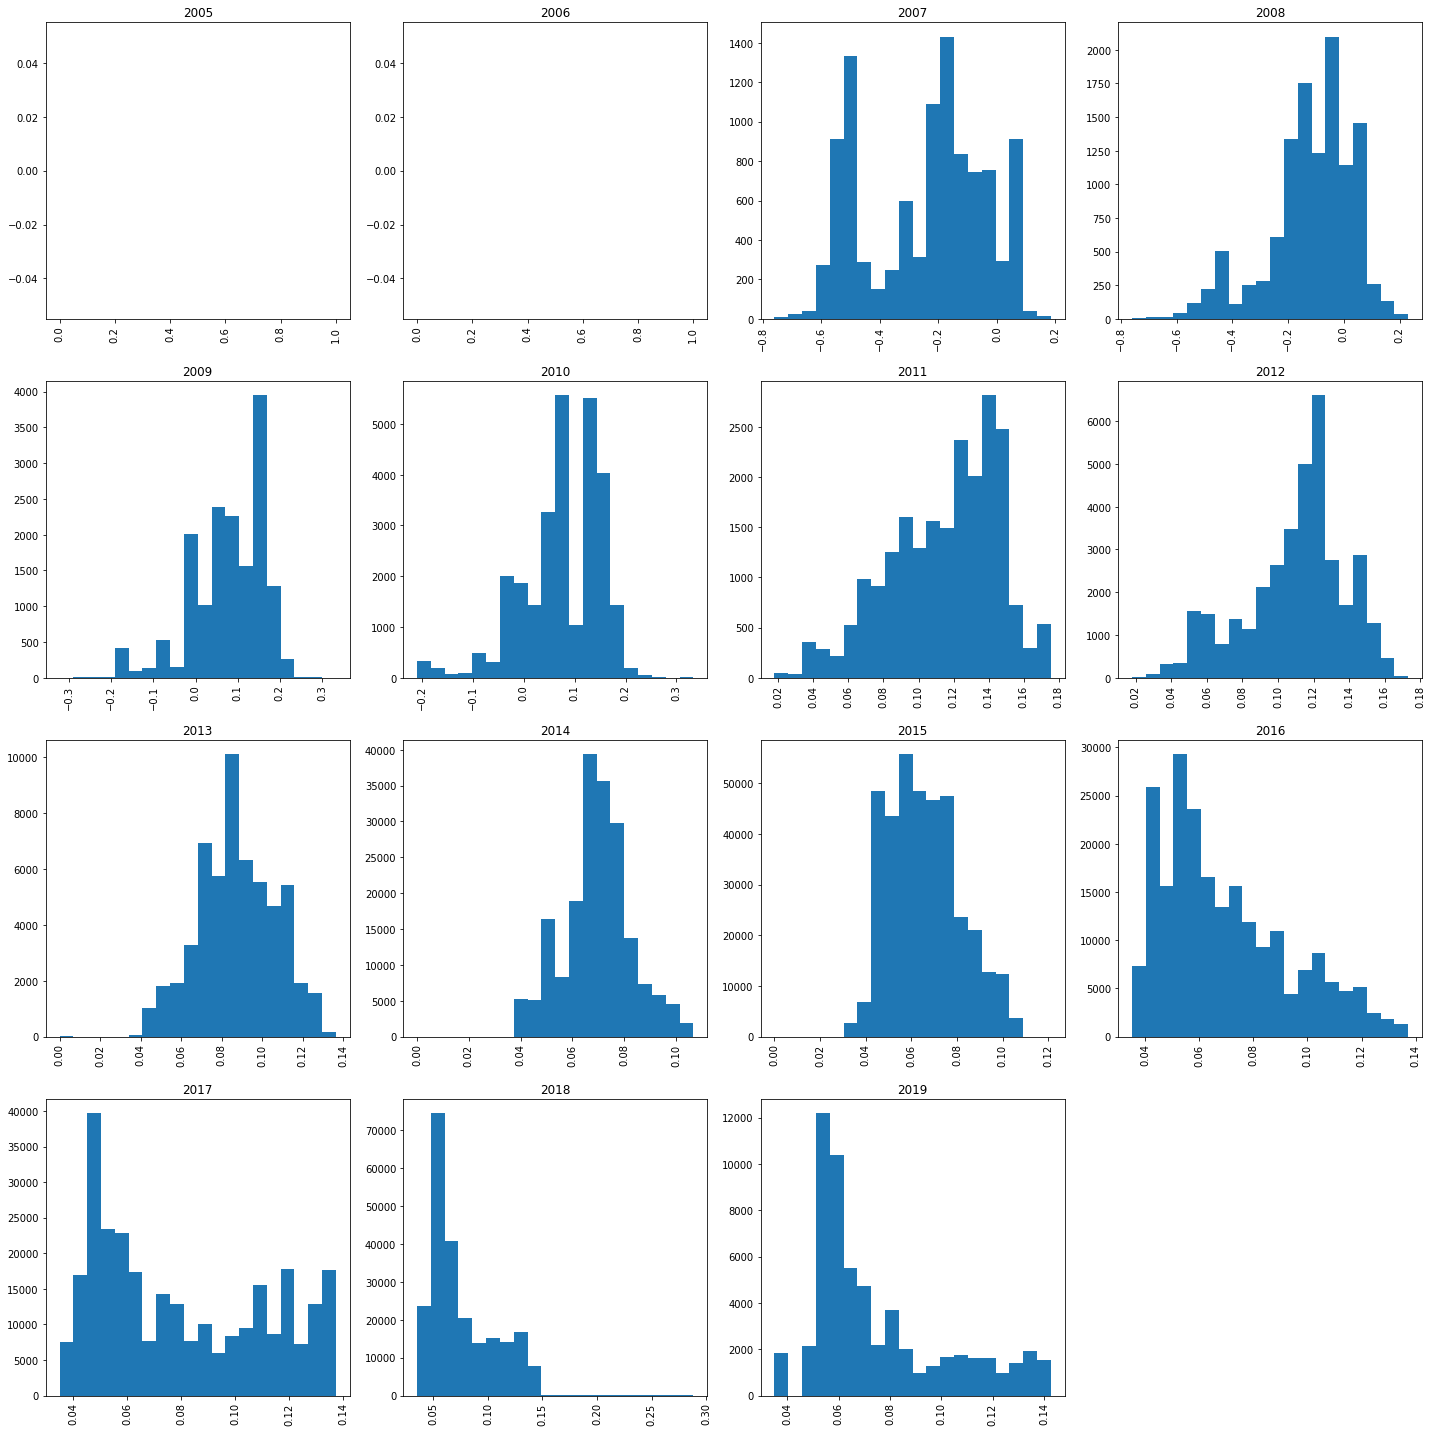

In [21]:
prosper_master_df['estimated_return'].hist(by=prosper_master_df['Year'],figsize=(20,20),bins=20)
plt.title("Estimated Return by Year")
plt.xlabel("Estimated Return")
plt.ylabel("# of Loans")
plt.tight_layout()

# Explore Prosper Loans API/CSV

In [22]:
prosper_2019_loans = pd.read_csv('prosper_loans_20190101to20190624.csv')
prosper_2018_loans = pd.read_csv('prosper_loans_20180101to20190101.csv')
prosper_2017_loans = pd.read_csv('prosper_loans_20170101to20180101.csv')
prosper_2016_loans = pd.read_csv('prosper_loans_20160101to20170101.csv')
prosper_2015_loans = pd.read_csv('prosper_loans_20150101to20160101.csv')
prosper_2014_loans = pd.read_csv('prosper_loans_20140101to20150101.csv')
prosper_2013_loans = pd.read_csv('prosper_loans_20130101to20140101.csv')
prosper_2005to2013_loans = pd.read_csv('prosper_loans_20050101to20130101.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
#Print Shape of Each DataFrame
print(prosper_2019_loans.shape)
print(prosper_2018_loans.shape)
print(prosper_2017_loans.shape)
print(prosper_2016_loans.shape)
print(prosper_2015_loans.shape)
print(prosper_2014_loans.shape)
print(prosper_2013_loans.shape)
print(prosper_2005to2013_loans.shape)

(57068, 21)
(198757, 21)
(223011, 21)
(156648, 21)
(265031, 21)
(123208, 21)
(33912, 21)
(67496, 21)


In [24]:
prosper_2013_loans.columns.values.all() == prosper_2019_loans.columns.values.all()

True

In [25]:
prosper_2019_loans.columns.values

array(['loan_number', 'amount_borrowed', 'borrower_rate',
       'prosper_rating', 'term', 'age_in_months', 'origination_date',
       'days_past_due', 'principal_balance', 'service_fees_paid',
       'principal_paid', 'interest_paid', 'prosper_fees_paid',
       'late_fees_paid', 'debt_sale_proceeds_received', 'loan_status',
       'loan_status_description', 'loan_default_reason',
       'loan_default_reason_description', 'next_payment_due_date',
       'next_payment_due_amount'], dtype=object)

In [26]:
#create identifying column before dataframes merge
prosper_2019_loans['Year'] = 2019
prosper_2018_loans['Year'] = 2018
prosper_2017_loans['Year'] = 2017
prosper_2016_loans['Year'] = 2016
prosper_2015_loans['Year'] = 2015
prosper_2014_loans['Year'] = 2014
prosper_2013_loans['Year'] = 2013
prosper_2005to2013_loans['Year'] = prosper_2005to2013_loans['origination_date'].str[0:4]

In [27]:
prosper_master_loans = pd.concat([prosper_2019_loans,
                                  prosper_2018_loans,
                                  prosper_2017_loans,
                                  prosper_2016_loans,
                                  prosper_2015_loans,
                                  prosper_2014_loans,
                                  prosper_2013_loans,
                                  prosper_2005to2013_loans], 
                                 ignore_index=True)

In [54]:
prosper_master_df[['loan_origination_date','amount_funded']].sort_values(by=['loan_origination_date']).head(20)

,loan_origination_date,amount_funded
1413560,2005-11-15 00:00:00,1000.0
1413563,2005-11-18 00:00:00,1000.0
1413582,2005-11-22 00:00:00,2000.0
1413566,2005-11-22 00:00:00,2500.0
1413562,2005-11-23 00:00:00,1000.0
1413583,2005-11-25 00:00:00,4800.0
1413572,2005-11-25 00:00:00,15000.0
1413588,2005-11-28 00:00:00,4000.0
1413580,2005-11-28 00:00:00,5000.0
1413567,2005-11-28 00:00:00,5000.0


In [55]:
len(prosper_master_df.dropna(subset=['loan_origination_date']))

1123033

In [57]:
len(prosper_master_loans.dropna(subset=['origination_date']))

1125131

#### Merge dataframes without a primary key
- Use 'loan_origination_date' & 'origination_date'
- Use 'amount_funded' & 'amount_borrowed'
- Use 'borrower_rate' & 'borrower_rate'
- User 'prosper_rating' & 'prosper_rating'

In [60]:
prosper_master_loans.sort_values(by=['origination_date']).tail(20).T

,54570,54567,54562,54561,54559,54547,54526,54524,54510,54505,54499,54492,54482,54467,54465,54463,54461,54457,54450,56168
loan_number,1243497,1233485,1233698,1243962,1243230,1243017,1236541,1243428,1243716,1243197,1244088,1232507,1233050,1233080,1232756,1237291,1243527,1237465,1236298,1233305
amount_borrowed,13000,10000,12000,14500,15000,8814,20000,20000,6500,22000,8000,12000,10000,7500,16000,18000,10000,3500,10000,35000
borrower_rate,0.1324,0.2754,0.1454,0.2475,0.0794,0.0904,0.0704,0.1224,0.1224,0.235,0.0794,0.1064,0.1154,0.2475,0.1354,0.1464,0.0704,0.1684,0.3069,0.1414
prosper_rating,B,D,B,D,AA,A,AA,B,B,D,AA,A,B,D,B,B,AA,C,E,B
term,60,60,60,36,36,36,36,36,60,36,36,36,36,36,60,36,36,60,60,36
age_in_months,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
origination_date,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00,2019-04-30 00:00:00
days_past_due,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
principal_balance,12571.9,9917.77,11860.8,14220.4,14628.3,8599.04,19497.8,18934.6,6420.01,21567.6,7801.74,11714.1,9764.9,7355.36,15809.6,17595.8,9748.91,3463.38,9924.47,34208.2
service_fees_paid,-13.96,-8.84,-10.6,-12.81,-13.25,-7.79,-17.67,-17.67,-5.74,-19.44,-7.07,-10.6,-8.84,-6.63,-14.14,-15.9,-8.84,-3.2,-8.22,-30.92


In [ ]:
prosper_df = pd.merge(prosper_master_loans, prosper_master_df,  
                      how='left', 
                      left_on=['origination_date','amount_borrowed','borrower_rate','prosper_rating'], 
                      right_on = ['loan_origination_date','amount_funded','borrower_rate','prosper_rating'],
                     suffixes=('_loanAPI','_listAPI'))